## Setup

In [306]:
# Loading the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

## Loading the data

In [167]:
path = r'../data/raw/bone-marrow.csv'
raw_boneMarrow_df = pd.read_csv(path)

In [162]:
raw_boneMarrow_df.shape

(187, 37)

In [144]:
raw_boneMarrow_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Recipientgender       187 non-null    int64  
 1   Stemcellsource        187 non-null    int64  
 2   Donorage              187 non-null    float64
 3   Donorage35            187 non-null    int64  
 4   IIIV                  187 non-null    int64  
 5   Gendermatch           187 non-null    int64  
 6   DonorABO              187 non-null    int64  
 7   RecipientABO          186 non-null    float64
 8   RecipientRh           185 non-null    float64
 9   ABOmatch              186 non-null    float64
 10  CMVstatus             171 non-null    float64
 11  DonorCMV              185 non-null    float64
 12  RecipientCMV          173 non-null    float64
 13  Disease               187 non-null    object 
 14  Riskgroup             187 non-null    int64  
 15  Txpostrelapse         1

In [145]:
raw_boneMarrow_df.head()

,Recipientgender,Stemcellsource,Donorage,Donorage35,IIIV,Gendermatch,DonorABO,RecipientABO,RecipientRh,ABOmatch,...,extcGvHD,CD34kgx10d6,CD3dCD34,CD3dkgx10d8,Rbodymass,ANCrecovery,PLTrecovery,time_to_aGvHD_III_IV,survival_time,survival_status
0,1,1,22.830137,0,1,0,1,1.0,1.0,0.0,...,1.0,7.20,1.338760,5.38,35.0,19,51,32,999,0
1,1,0,23.342466,0,1,0,-1,-1.0,1.0,0.0,...,1.0,4.50,11.078295,0.41,20.6,16,37,1000000,163,1
2,1,0,26.394521,0,1,0,-1,-1.0,1.0,0.0,...,1.0,7.94,19.013230,0.42,23.4,23,20,1000000,435,1
3,0,0,39.684932,1,1,0,1,2.0,1.0,1.0,...,NaN,4.25,29.481647,0.14,50.0,23,29,19,53,1
4,0,1,33.358904,0,0,0,1,2.0,0.0,1.0,...,1.0,51.85,3.972255,13.05,9.0,14,14,1000000,2043,0


In [146]:
raw_boneMarrow_df.describe()

,Recipientgender,Stemcellsource,Donorage,Donorage35,IIIV,Gendermatch,DonorABO,RecipientABO,RecipientRh,ABOmatch,...,extcGvHD,CD34kgx10d6,CD3dCD34,CD3dkgx10d8,Rbodymass,ANCrecovery,PLTrecovery,time_to_aGvHD_III_IV,survival_time,survival_status
count,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,186.000000,185.000000,186.000000,...,156.000000,187.000000,182.000000,182.000000,185.000000,187.000000,187.000000,187.000000,187.000000,187.000000
mean,0.598930,0.775401,33.472068,0.443850,0.598930,0.171123,0.390374,0.274194,0.854054,0.720430,...,0.820513,11.891781,5.385096,4.745714,35.801081,26752.866310,90937.919786,775408.042781,938.743316,0.454545
std,0.491431,0.418438,8.271826,0.498171,0.491431,0.377627,0.837632,0.938706,0.354010,0.449999,...,0.384996,9.914386,9.598716,3.859128,19.650922,161747.200525,288242.407688,418425.252689,849.589495,0.499266
min,0.000000,0.000000,18.646575,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,...,0.000000,0.790000,0.204132,0.040000,6.000000,9.000000,9.000000,10.000000,6.000000,0.000000
25%,0.000000,1.000000,27.039726,0.000000,0.000000,0.000000,0.000000,-1.000000,1.000000,0.000000,...,1.000000,5.350000,1.786683,1.687500,19.000000,13.000000,16.000000,1000000.000000,168.500000,0.000000
50%,1.000000,1.000000,33.550685,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,9.720000,2.734462,4.325000,33.000000,15.000000,21.000000,1000000.000000,676.000000,0.000000
75%,1.000000,1.000000,40.117809,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,15.415000,5.823565,6.785000,50.600000,17.000000,37.000000,1000000.000000,1604.000000,1.000000
max,1.000000,1.000000,55.553425,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,...,1.000000,57.780000,99.560970,20.020000,103.400000,1000000.000000,1000000.000000,1000000.000000,3364.000000,1.000000


In [147]:
# Missing values
nan_counts = raw_boneMarrow_df.isna().sum()
columnas_con_nan = nan_counts[nan_counts > 0]
columnas_con_nan_ordenadas = columnas_con_nan.sort_values(ascending=False)
print(columnas_con_nan_ordenadas)

extcGvHD        31
CMVstatus       16
RecipientCMV    14
CD3dCD34         5
CD3dkgx10d8      5
DonorCMV         2
RecipientRh      2
Rbodymass        2
ABOmatch         1
RecipientABO     1
Allele           1
Antigen          1
dtype: int64


In [148]:
# Duplicate values
raw_boneMarrow_df.duplicated().sum()

np.int64(0)

## Adding some visualizations

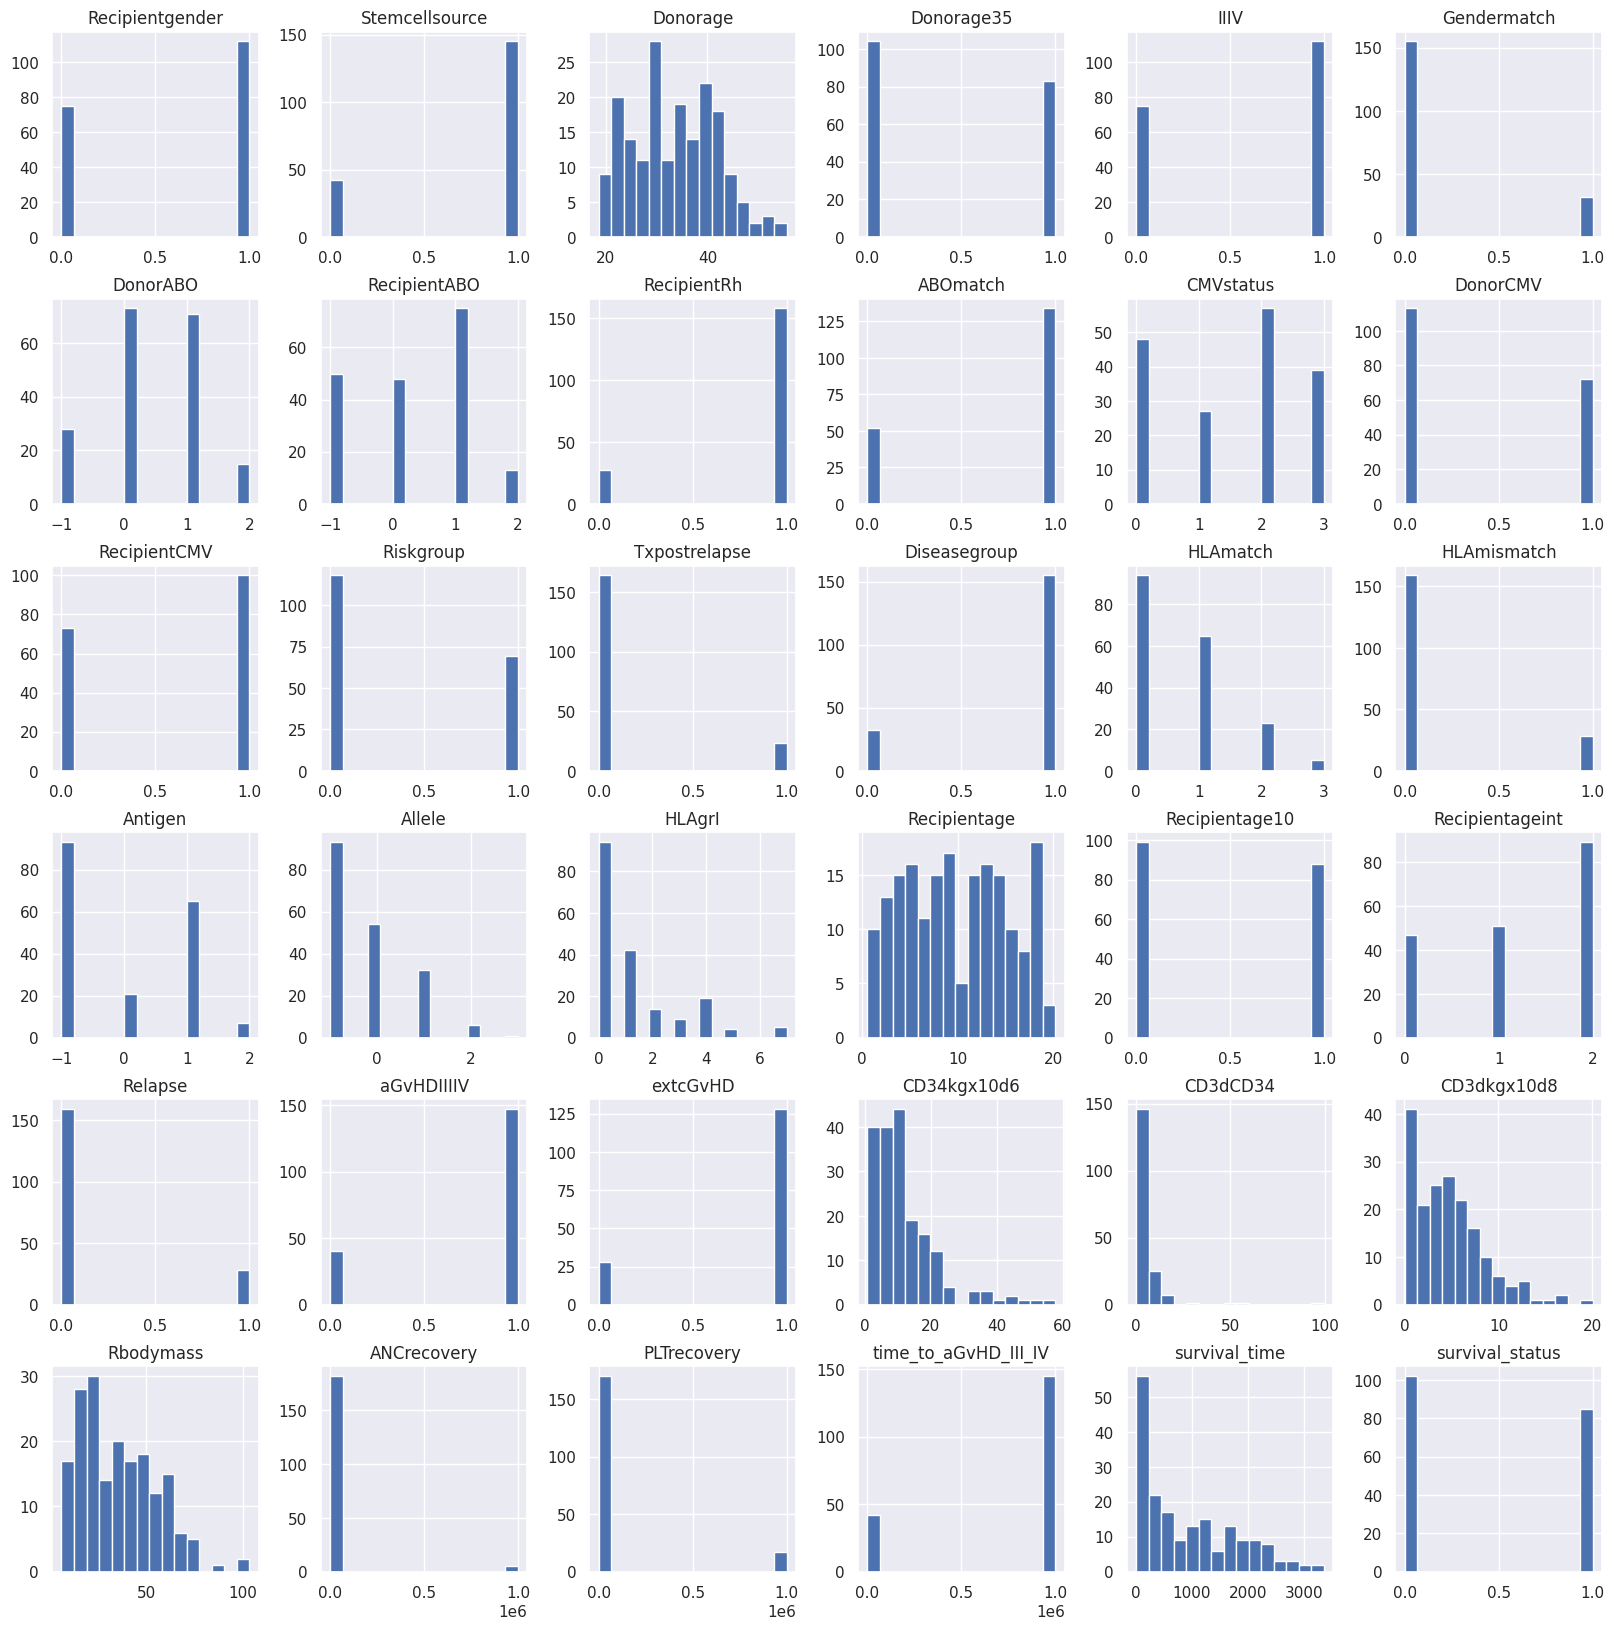

In [149]:
# Looking at the distributions
raw_boneMarrow_df.hist(bins=15, figsize=(20, 20))
plt.show()

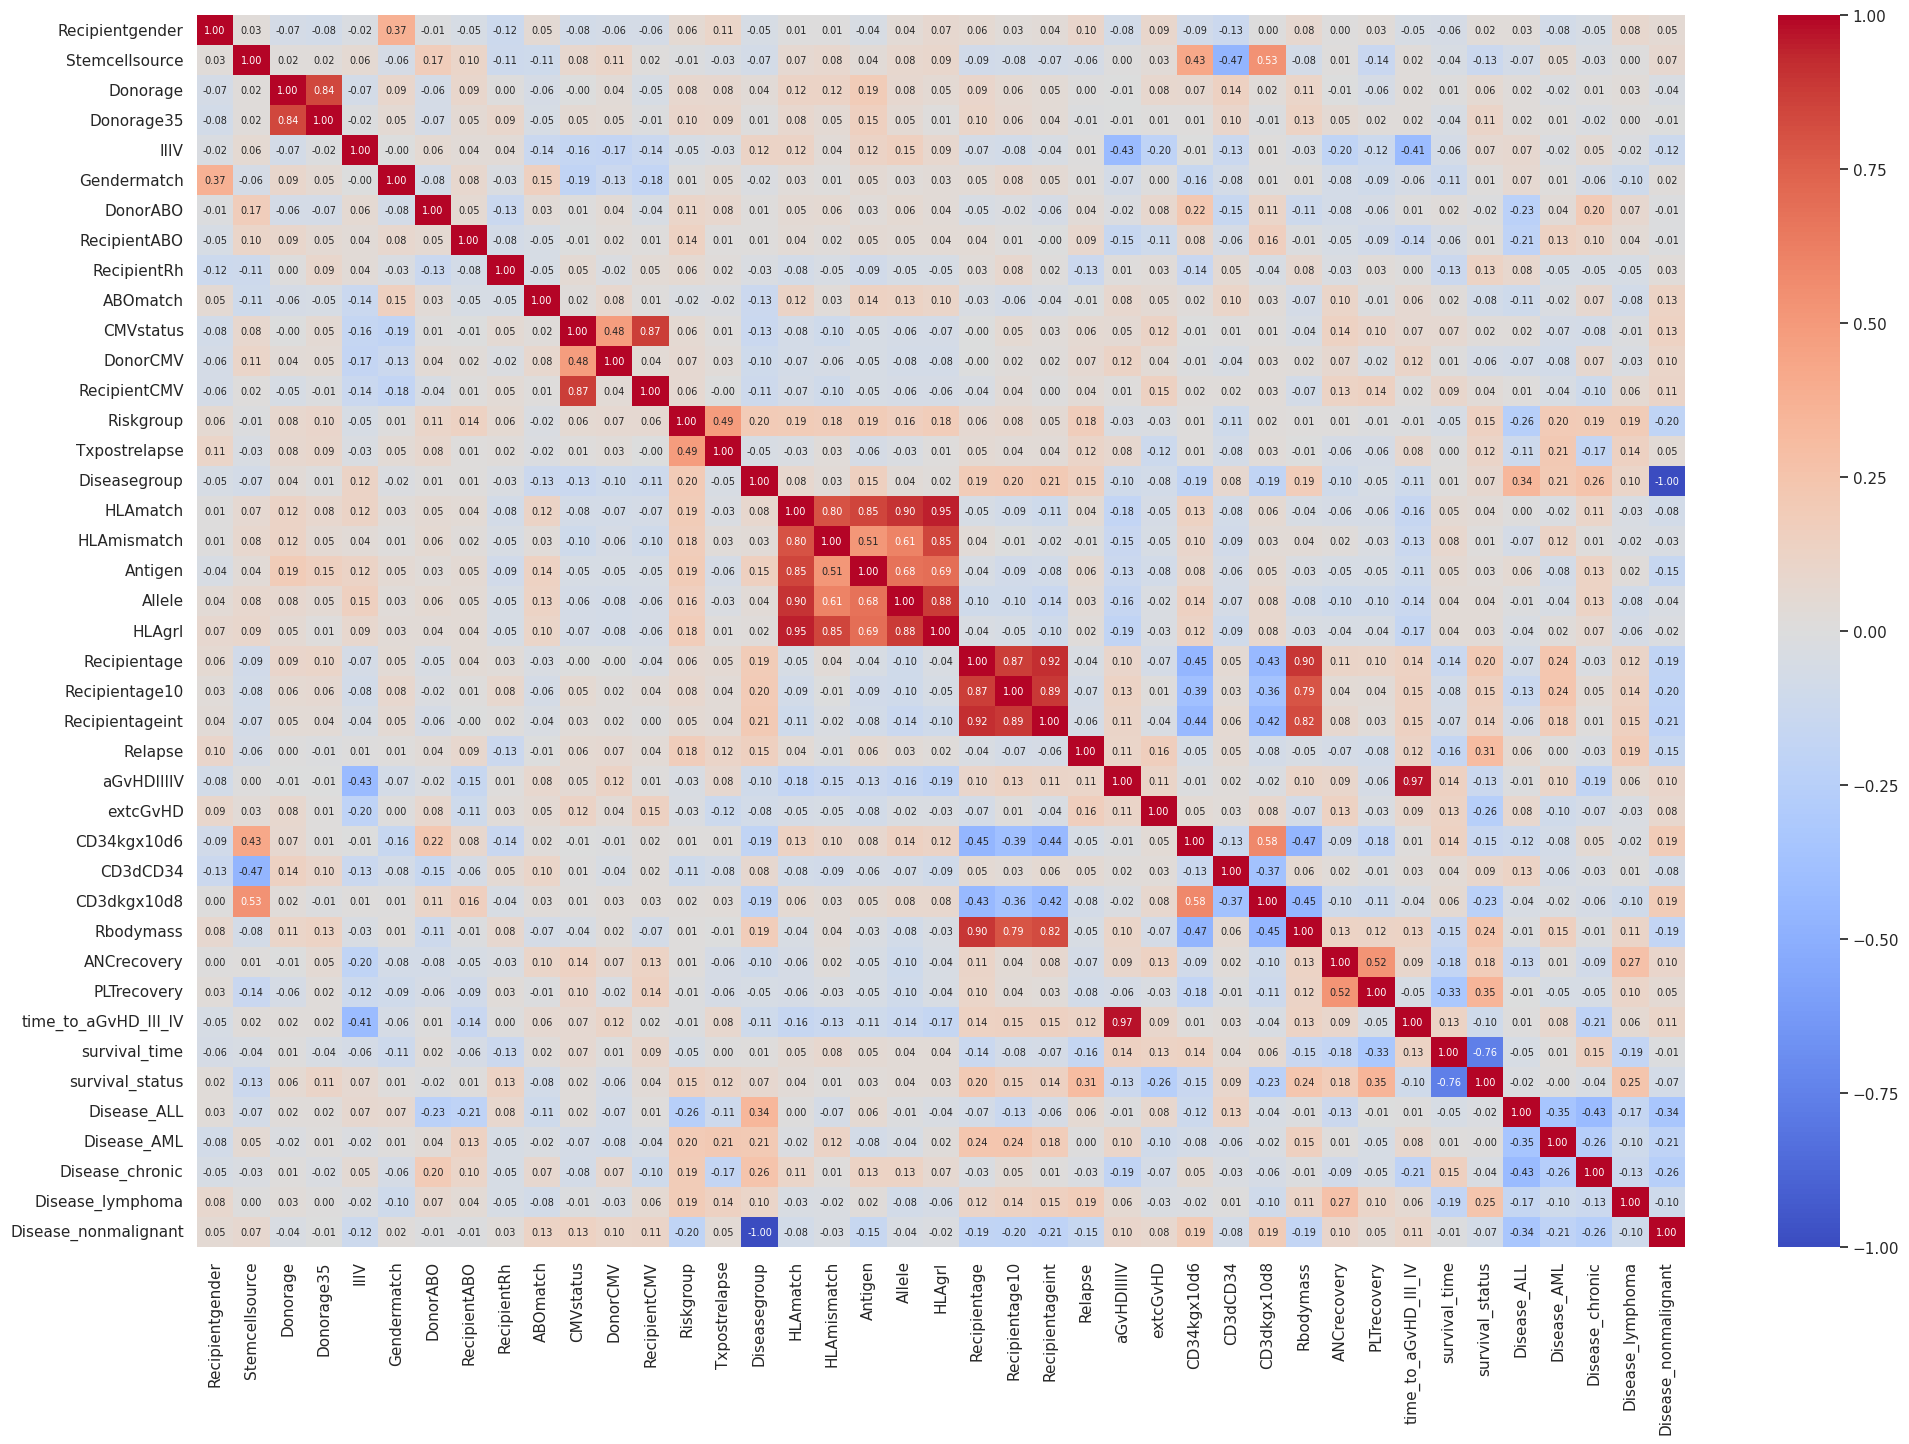

In [150]:
# Looking at the correlations
temp_df = raw_boneMarrow_df.copy()
temp_df = pd.get_dummies(temp_df, columns=['Disease'])
plt.figure(figsize=(24,16))
sns.heatmap(temp_df.corr(), fmt='.2f', annot=True, cmap='coolwarm', annot_kws={"size": 7})
plt.show()

## Preprocessing and Feature Engineering

In [291]:
# df Copy for preprocessing
clean_boneMarrow_df = raw_boneMarrow_df.copy()

In [292]:
# One-Hot Encoding for the Disease feature
disease_encoded_df = pd.get_dummies(clean_boneMarrow_df['Disease'], prefix='Disease')
clean_boneMarrow_df = pd.concat([clean_boneMarrow_df, disease_encoded_df], axis=1)
clean_boneMarrow_df.drop('Disease', axis=1, inplace=True)

In [293]:
# The Diseasegroup column has a perfect correlation with the created Disease_nonmalignant feature, which makes it important to remove to avoid redundancy
clean_boneMarrow_df.drop('Diseasegroup', axis=1, inplace=True)

In [294]:
# Missin values imputation
categorical_features = ['RecipientABO', 'RecipientRh', 'ABOmatch', 'CMVstatus', 'DonorCMV', 'RecipientCMV',
                     'Antigen', 'Allele', 'extcGvHD']
numerical_features = ['CD3dCD34', 'CD3dkgx10d8', 'Rbodymass']

# Imputer for categorical features (Mode)
imputer_cat = SimpleImputer(strategy='most_frequent')

# Imputer for numerical features (Median)
imputer_num = SimpleImputer(strategy='median')

# Apply imputation
clean_boneMarrow_df[categorical_features] = imputer_cat.fit_transform(clean_boneMarrow_df[categorical_features])
clean_boneMarrow_df[numerical_features] = imputer_num.fit_transform(clean_boneMarrow_df[numerical_features])

In [295]:
# Wrong Values According to Domain Knowledge
error_rules = {
        'Recipientgender': lambda x: x in [0, 1],  # 0: Femenino, 1: Masculino
        'Stemcellsource': lambda x: x in [0, 1],  # 0: Sangre periférica, 1: Médula ósea
        'Donorage': lambda x: (0 <= x <= 120),  # Edad del donante fuera del rango
        'Donorage35': lambda x: x in [0, 1],  # Edad del donante fuera del rango
        'IIIV': lambda x: x in [0, 1],  # Clasificación del trasplante entre I y IV
        'Gendermatch': lambda x: x in [0, 1],  # 0: No compatible, 1: Compatible
        'DonorABO': lambda x: x in [-1, 0, 1, 2],  # -1: B, 0: O, 1: A, 2: AB
        'RecipientABO': lambda x: x in [-1, 0, 1, 2],  # -1: B, 0: O, 1: A, 2: AB
        'RecipientRh': lambda x: x in [0, 1],  # 0: Rh-, 1: Rh+
        'ABOmatch': lambda x: x in [0, 1],  # 0: Mismatched, 1: Matched
        'CMVstatus': lambda x: x in [0, 1, 2, 3],  # Presencia/ausencia de CMV y otros estados
        'DonorCMV': lambda x: x in [0, 1],  # 0: Negativo, 1: Positivo
        'RecipientCMV': lambda x: x in [0, 1],  # 0: Negativo, 1: Positivo
        #'Disease': lambda x: x in ['ALL', 'AML', 'chronic', 'nonmalignant', 'lymphoma'],  # Tipos de enfermedad
        'Riskgroup': lambda x: x in [0, 1],  # 0: Bajo, 1: Alto
        'Txpostrelapse': lambda x: x in [0, 1],  # 0: No, 1: Sí (trasplante tras recaída)
        #'Diseasegroup': lambda x: x in [0, 1],  # 0: No maligna, 1: Maligna
        'HLAmatch': lambda x: x in [0, 1, 2, 3],  # Compatibilidad HLA 7/10 a 10/10
        'HLAmismatch': lambda x: x in [0, 1],  # 0: Compatible, 1: No compatible
        'Antigen': lambda x: x in [-1, 0, 1, 2],  # Diferencia de antígenos entre donante y receptor
        'Allele': lambda x: x in [-1, 0, 1, 2, 3],  # Diferencia de alelos entre donante y receptor
        'HLAgrI': lambda x: (0 <= x <= 5),  # Grado de diferencia HLA (fuera de rango)
        'Recipientage': lambda x: (0 <= x <= 120),  # Edad del receptor fuera de rango
        'Recipientage10': lambda x: x in [0, 1],  # 0: >= 10 años, 1: < 10 años
        'Recipientageint': lambda x: x in [0, 1, 2],  # Edad del receptor discretizada en intervalos
        'Relapse': lambda x: x in [0, 1],  # 0: No, 1: Sí (recaída)
        'aGvHDIIIIV': lambda x: x in [0, 1, 2, 3],  # Grado de GvHD aguda entre 0 y IV
        'extcGvHD': lambda x: x in [0, 1],  # 0: No, 1: Sí (GvHD crónica extensa)
        'CD34kgx10d6': lambda x: (0 <= x <= 60),  # Dosis de CD34+ fuera de rango
        'CD3dCD34': lambda x: (0 <= x <= 100),  # Relación CD3/CD34 fuera de rango
        'CD3dkgx10d8': lambda x: (0 <= x <= 21),  # Dosis de CD3+ fuera de rango
        'Rbodymass': lambda x: (6 <= x <= 104),  # Masa corporal del receptor fuera de rango
        'ANCrecovery': lambda x: (7 <= x <= 30),  # Tiempo de recuperación de neutrófilos fuera de rango
        'PLTrecovery': lambda x: (0 <= x <= 365),  # Tiempo de recuperación de plaquetas fuera de rango
        'time_to_aGvHD_III_IV': lambda x: (0 <= x <= 365),  # Tiempo en días hasta GvHD aguda
        'survival_time': lambda x: (0 <= x <= 4000),  # Tiempo de supervivencia fuera de rango
        'survival_status': lambda x: x in [0, 1],  # 0: Vivo, 1: Fallecido
    }

wrong_variables = set()  # Usar un set para evitar duplicados
for col, rule in error_rules.items():
    errors = clean_boneMarrow_df[~clean_boneMarrow_df[col].apply(rule)]  # Filtrar los valores que NO cumplen la regla definida
    num_errors = len(errors)
    if num_errors > 0:
        print(f'Variable: {col}, Wrong values detected: {num_errors}')
        if col != 'time_to_aGvHD_III_IV':
            wrong_variables.update(errors.index.tolist())

# time_to_aGvHD_III_IV has an almost perfect correlation with the variable aGvHDIIIIV. Considering the amount of errors it has, it is more viable to eliminate it without losing information due to aGvHDIIIIV.
clean_boneMarrow_df.drop('time_to_aGvHD_III_IV', axis=1, inplace=True)

# Deleting the wrong missing values
clean_boneMarrow_df.drop(index=wrong_variables, inplace=True)
print("Wrong values resolved")

Variable: HLAgrI, Wrong values detected: 5
Variable: ANCrecovery, Wrong values detected: 5
Variable: PLTrecovery, Wrong values detected: 17
Variable: time_to_aGvHD_III_IV, Wrong values detected: 145
Wrong values resolved


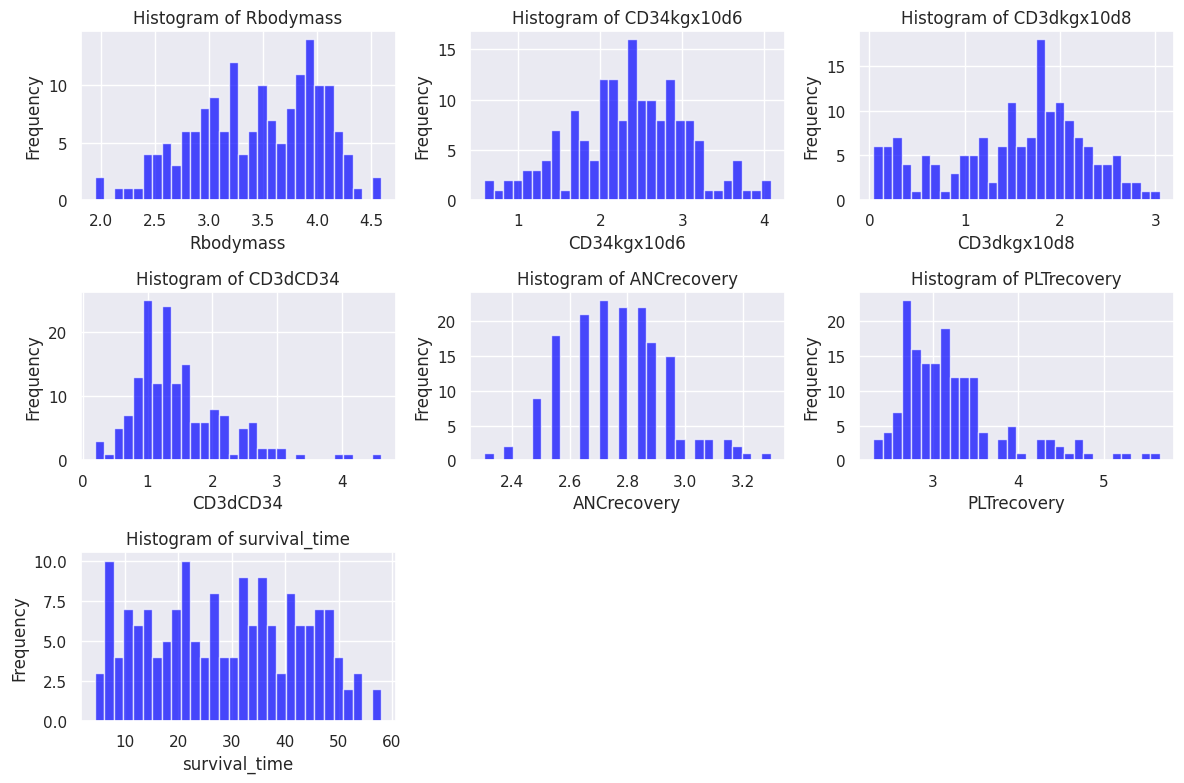

In [296]:
# Transformations
log_columns = ['Rbodymass', 'CD34kgx10d6', 'CD3dkgx10d8', 'CD3dCD34', 'ANCrecovery', 'PLTrecovery']
sqrt_columns = ['survival_time']

# Apply logarithmic transformation
for col in log_columns:
        clean_boneMarrow_df[col] = np.log1p(clean_boneMarrow_df[col])  # log1p(x) = log(1 + x) para evitar log(0)

# Apply square root transformation
for col in sqrt_columns:
        clean_boneMarrow_df[col] = np.sqrt(clean_boneMarrow_df[col])

# Histogram
plot_columns = log_columns + sqrt_columns

# Create histograms for each column
plt.figure(figsize=(12, 8))
for i, col in enumerate(plot_columns, 1):
    plt.subplot(3, 3, i)  # Adjust rows and columns depending on the number of variables
    plt.hist(clean_boneMarrow_df[col], bins=30, alpha=0.7, color='blue')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

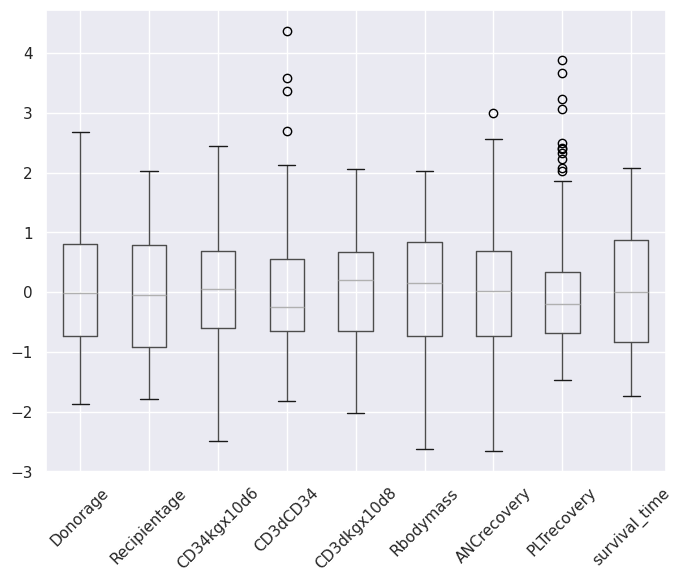

In [298]:
# Numerical data standardization 
standard_columns = ['Donorage', 'Recipientage', 'CD34kgx10d6', 'CD3dCD34', 'CD3dkgx10d8',  'Rbodymass', 'ANCrecovery', 'PLTrecovery', 'survival_time']

scaler = StandardScaler()
clean_boneMarrow_df[standard_columns] = scaler.fit_transform(clean_boneMarrow_df[standard_columns])

plt.figure(figsize=(8, 6))
clean_boneMarrow_df[standard_columns].boxplot()
plt.xticks(rotation=45)
plt.show()

In [299]:
# Remove outliers
outliers_columns = ['CD3dCD34', 'ANCrecovery', 'PLTrecovery']
for col in outliers_columns:
    Q1 = clean_boneMarrow_df[col].quantile(0.25)
    Q3 = clean_boneMarrow_df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter out outliers
    clean_boneMarrow_df[col] = clean_boneMarrow_df[col].apply(
        lambda x: x if lower_bound <= x <= upper_bound else np.nan
    )

## Splitting the dataset

In [ ]:
# df Copy for splitting
split_boneMarrow_df = clean_boneMarrow_df.copy()

X = split_boneMarrow_df.drop('survival_status', axis=1)
y = split_boneMarrow_df['survival_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Training the model

In [ ]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

## Evaluating the model

In [303]:
y_pred = model.predict(X_test)

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Report
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print(report_df)

## Improving the model

In [ ]:
scores = cross_val_score(model, X, y, cv=5)
print("Average accuracy with CV:", np.mean(scores))